## Processing Emotion Videos for **Résident1**

###  Setting up the Detector

We'll begin by creating a new `Detector` instance just like the previous tutorial and using the defaults:

In [1]:
from feat import Detector

detector = Detector()

detector

INFO:root:Loading Face model: retinaface
INFO:root:Loading Facial Landmark model: mobilefacenet
INFO:root:Loading facepose model: img2pose
INFO:root:Loading AU model: xgb
INFO:root:Loading emotion model: resmasknet
INFO:root:Loading Identity model: facenet


feat.detector.Detector(face_model=retinaface, landmark_model=mobilefacenet, au_model=xgb, emotion_model=resmasknet, facepose_model=img2pose, identity_model=facenet)

In [4]:
from IPython.core.display import Video, display
import os
import cv2


base_path = "/home/maram/Downloads/PrendreLaParole/newFPS/resident1"

## 1 Processing the 1st video: Happiness

### 1.1 Load the video

In [5]:

emotionHappiness_dir = os.path.join(base_path, "happiness")

for filename in os.listdir(emotionHappiness_dir):
    if filename.lower().endswith(".mp4"):
        path_to_vidHappiness = os.path.join(emotionHappiness_dir, filename)
        print(f"\n--- happiness ---")
        video = cv2.VideoCapture(path_to_vidHappiness)
        fps = video.get(cv2.CAP_PROP_FPS)
        print(f"FPS: {fps}")
        video.release()
        display(Video(path_to_vidHappiness, embed=False))



--- happiness ---
FPS: 25.0


### 1.2 Process the video

In [6]:
video_predictionHappiness = detector.detect_video(
    path_to_vidHappiness, data_type="video", skip_frames=1, face_detection_threshold=0.95
)

  0%|          | 0/40 [00:00<?, ?it/s]

INFO:root:VideoDataset: RESCALING WARNING: from (720, 1280) to output_size=700
INFO:root:detecting faces...
INFO:root:detecting landmarks...
INFO:root:RESCALING WARNING: image_operations.extract_face_from_bbox() is rescaling cropped img with shape torch.Size([3, 76, 76]) to 112
INFO:root:detecting poses...
INFO:root:img2pose: RESCALING WARNING: img2pose has a min img size of 400 and a max img size of 1400 but checked value is torch.Size([393, 700]).
INFO:root:detecting aus...
INFO:root:detecting emotions...
INFO:root:detecting identity...
INFO:root:RESCALING WARNING: image_operations.extract_face_from_bbox() is rescaling cropped img with shape torch.Size([3, 76, 76]) to 112
INFO:root:inverting face transform...
INFO:root:inverting landmark transform...
INFO:root:creating fex output...
  2%|▎         | 1/40 [00:01<00:44,  1.15s/it]INFO:root:VideoDataset: RESCALING WARNING: from (720, 1280) to output_size=700
INFO:root:detecting faces...
INFO:root:detecting landmarks...
INFO:root:RESCALI

### Save as csv

In [7]:
import os

csv_path = os.path.join(os.path.dirname(path_to_vidHappiness), "pyFeat-happiness.csv")
video_predictionHappiness.aus.to_csv(csv_path)

### 1.3 Visualizing predictions

In [8]:
video_predictionHappiness.aus

,AU01,AU02,AU04,AU05,AU06,AU07,AU09,AU10,AU11,AU12,AU14,AU15,AU17,AU20,AU23,AU24,AU25,AU26,AU28,AU43
frame,,,,,,,,,,,,,,,,,,,,
0,0.544700,0.529393,0.153745,0.321403,0.703003,0.0,0.200630,0.483274,1.0,0.736786,0.538892,0.244208,0.330317,1.0,0.561649,0.034194,0.996596,0.815815,0.091881,0.094148
1,0.515321,0.496892,0.136554,0.321403,0.694664,1.0,0.203824,0.729711,1.0,0.725239,0.562421,0.292961,0.330508,1.0,0.556919,0.033699,0.993493,0.858440,0.106491,0.080210
2,0.519810,0.432502,0.169564,0.329499,0.679726,1.0,0.168599,0.929743,1.0,0.698662,0.521844,0.209343,0.261180,1.0,0.542313,0.023665,0.999953,0.798244,0.065630,0.117750
3,0.516423,0.423585,0.261388,0.323572,0.682240,1.0,0.168034,0.968736,1.0,0.691146,0.485715,0.191654,0.267142,1.0,0.419164,0.016074,0.999639,0.694834,0.221822,0.105238
4,0.656227,0.595320,0.070104,0.437081,0.788044,0.0,0.302129,0.292414,0.0,0.697501,0.633310,0.332247,0.234914,1.0,0.314617,0.022258,0.999830,0.808447,0.024346,0.104152
5,0.611126,0.498861,0.088451,0.219173,0.634502,0.0,0.342533,0.378995,1.0,0.567249,0.762404,0.333672,0.274047,1.0,0.577898,0.017045,0.997974,0.810141,0.056402,0.383158
6,0.569170,0.482960,0.029478,0.338433,0.287848,0.0,0.327265,0.108912,1.0,0.070260,0.505636,0.099426,0.250660,1.0,0.433228,0.008828,0.999301,0.667148,0.031024,0.169318
7,0.581875,0.544364,0.057689,0.333489,0.287848,0.0,0.317774,0.140339,1.0,0.063320,0.547337,0.070602,0.278151,1.0,0.425391,0.010928,0.999347,0.731283,0.068255,0.137753
8,0.508675,0.478347,0.060400,0.338350,0.280540,0.0,0.305584,0.443728,1.0,0.090727,0.402592,0.211228,0.295402,1.0,0.570575,0.012699,0.991339,0.757650,0.073486,0.112598


In [9]:
average_aus = video_predictionHappiness.aus.mean()

# Display the result
print("Average AU intensities across all frames (Happiness) :\n")
print(average_aus)

Average AU intensities across all frames (Happiness) :

AU01    0.464822
AU02    0.379557
AU04    0.167306
AU05    0.356995
AU06    0.388644
AU07    0.225000
AU09    0.246563
AU10    0.423850
AU11    0.725000
AU12    0.315213
AU14    0.535974
AU15    0.308160
AU17    0.318597
AU20    0.875000
AU23    0.428820
AU24    0.105322
AU25    0.935029
AU26    0.668292
AU28    0.162300
AU43    0.144353
dtype: float32


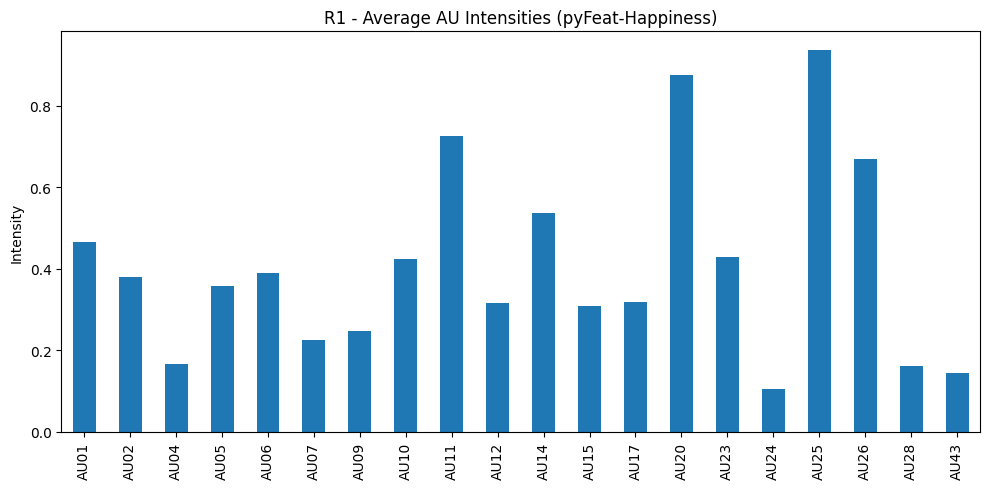

In [10]:
import matplotlib.pyplot as plt

average_aus.plot(kind='bar', figsize=(10, 5), title="R1 - Average AU Intensities (pyFeat-Happiness)")
plt.ylabel("Intensity")
plt.tight_layout()
plt.savefig("/home/maram/Downloads/PrendreLaParole/newFPS/resident1/happiness/happiness_pyFeat_au_plot.png")
plt.show()

In [11]:
print(video_predictionHappiness.frame.unique())


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]


[<Figure size 1500x700 with 3 Axes>]

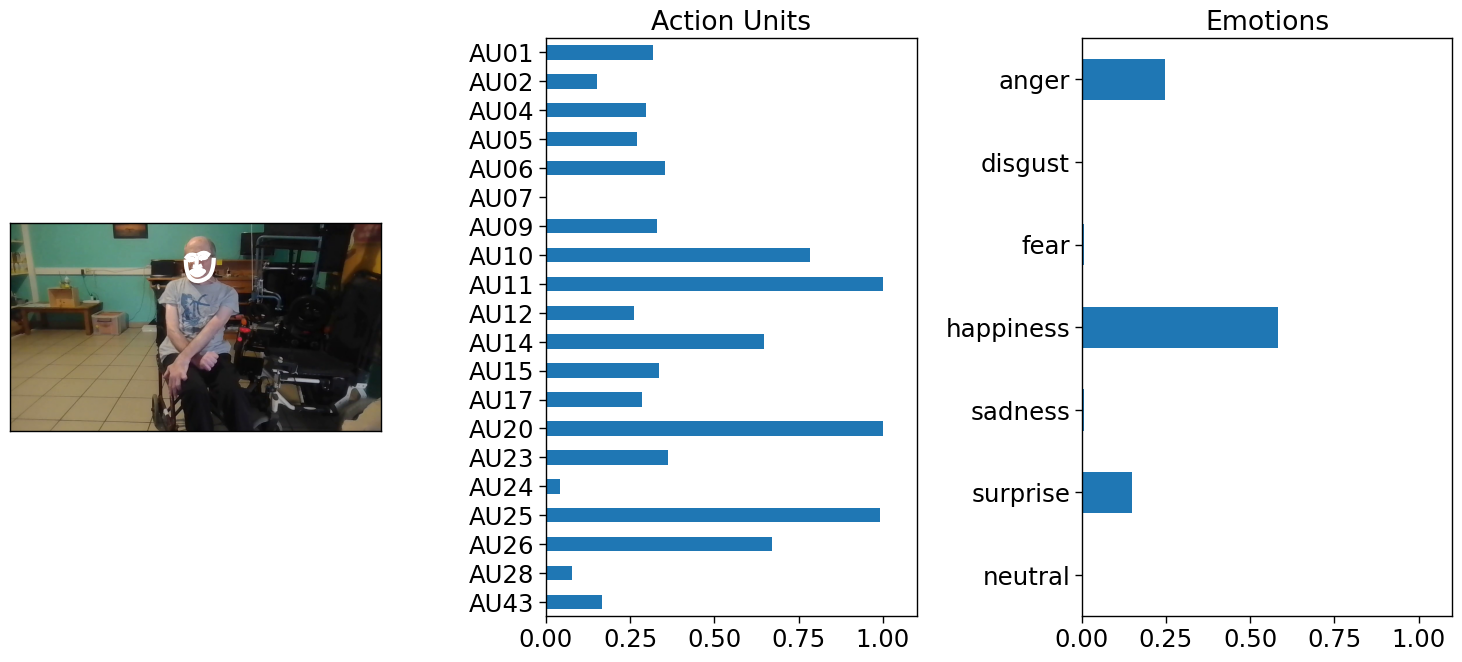

In [12]:
video_predictionHappiness.query("frame == 24").plot_detections(
    faceboxes=False, add_titles=False
)

In [13]:
video_predictionHappiness.emotions.head()

,anger,disgust,fear,happiness,sadness,surprise,neutral
frame,,,,,,,
0,0.280135,0.002163,0.022496,0.181412,0.003283,0.503512,0.006998
1,0.280037,0.002159,0.022407,0.181284,0.003275,0.503849,0.006988
2,0.067138,0.000320,0.005911,0.151222,0.000573,0.771921,0.002915
3,0.065657,0.000308,0.005352,0.147044,0.000582,0.778071,0.002985
4,0.098988,0.000285,0.003497,0.093790,0.000862,0.799927,0.002651


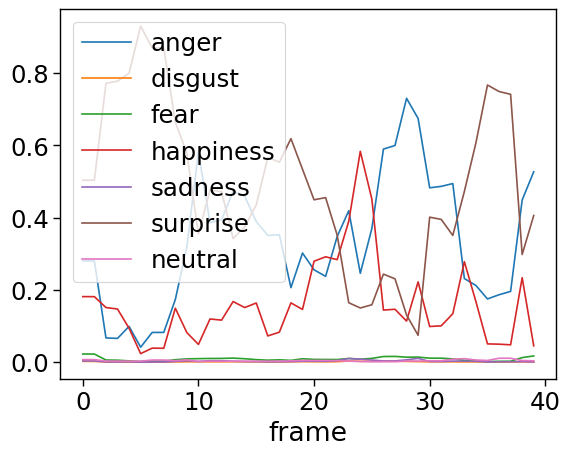

In [14]:
axes = video_predictionHappiness.emotions.plot()

## 2. Processing the 2nd video: Fear

### 2.1 Load the video

In [15]:
emotionFear_dir = os.path.join(base_path, "fear")

for filename in os.listdir(emotionFear_dir):
    if filename.lower().endswith(".mp4"):
        path_to_vidFear = os.path.join(emotionFear_dir, filename)
        print(f"\n--- fear ---")
        video = cv2.VideoCapture(path_to_vidFear)
        fps = video.get(cv2.CAP_PROP_FPS)
        print(f"FPS: {fps}")
        video.release()
        display(Video(path_to_vidFear, embed=False))



--- fear ---
FPS: 25.0


### 2.2 Process the video

In [16]:
video_predictionFear = detector.detect_video(
    path_to_vidFear, data_type="video", skip_frames=1, face_detection_threshold=0.95
)

  0%|          | 0/52 [00:00<?, ?it/s]INFO:root:VideoDataset: RESCALING WARNING: from (720, 1280) to output_size=700


INFO:root:detecting faces...
INFO:root:detecting landmarks...
INFO:root:RESCALING WARNING: image_operations.extract_face_from_bbox() is rescaling cropped img with shape torch.Size([3, 78, 78]) to 112
INFO:root:detecting poses...
INFO:root:img2pose: RESCALING WARNING: img2pose has a min img size of 400 and a max img size of 1400 but checked value is torch.Size([393, 700]).
INFO:root:detecting aus...
INFO:root:detecting emotions...
INFO:root:detecting identity...
INFO:root:RESCALING WARNING: image_operations.extract_face_from_bbox() is rescaling cropped img with shape torch.Size([3, 78, 78]) to 112
INFO:root:inverting face transform...
INFO:root:inverting landmark transform...
INFO:root:creating fex output...
  2%|▏         | 1/52 [00:01<01:00,  1.19s/it]INFO:root:VideoDataset: RESCALING WARNING: from (720, 1280) to output_size=700
INFO:root:detecting faces...
INFO:root:detecting landmarks...
INFO:root:RESCALING WARNING: image_operations.extract_face_from_bbox() is rescaling cropped img 

### save as csv

In [17]:
import os

csv_path = os.path.join(os.path.dirname(path_to_vidFear), "pyFeat-fear.csv")
video_predictionFear.aus.to_csv(csv_path)

### 1.3 Visualizing predictions

In [18]:
video_predictionFear.aus

,AU01,AU02,AU04,AU05,AU06,AU07,AU09,AU10,AU11,AU12,AU14,AU15,AU17,AU20,AU23,AU24,AU25,AU26,AU28,AU43
frame,,,,,,,,,,,,,,,,,,,,
0,0.600280,0.163080,0.432118,0.483363,0.069311,0.0,0.195871,0.001171,0.0,0.019380,0.211410,0.580366,0.467672,0.0,0.682656,0.242905,0.491295,0.444499,0.318910,0.124222
1,0.631691,0.219909,0.466925,0.474669,0.064408,0.0,0.194787,0.006257,0.0,0.020079,0.142112,0.634247,0.461686,0.0,0.595317,0.366753,0.465532,0.477429,0.560315,0.088160
2,0.618635,0.216254,0.526967,0.450803,0.063701,0.0,0.197461,0.011457,0.0,0.018594,0.154942,0.701604,0.462682,0.0,0.600719,0.351061,0.438058,0.519445,0.455137,0.088160
3,0.700487,0.229377,0.382158,0.492612,0.065632,0.0,0.187617,0.001061,1.0,0.019421,0.418373,0.668672,0.486132,0.0,0.725906,0.343339,0.041303,0.322270,0.467798,0.060495
4,0.674018,0.231002,0.431428,0.474419,0.065632,0.0,0.186121,0.000070,1.0,0.023977,0.457292,0.517608,0.491870,0.0,0.659319,0.382408,0.373639,0.306711,0.265223,0.069740
5,0.757230,0.205676,0.524277,0.475667,0.058863,0.0,0.176708,0.000318,1.0,0.016660,0.311908,0.563869,0.462688,0.0,0.524501,0.458649,0.127733,0.294920,0.479323,0.067299
6,0.599937,0.148631,0.508879,0.445615,0.059458,0.0,0.148111,0.003703,0.0,0.016170,0.317982,0.848333,0.515995,0.0,0.601764,0.503608,0.154625,0.434109,0.390021,0.095619
7,0.559444,0.186423,0.460801,0.443203,0.062428,0.0,0.161907,0.001692,0.0,0.013164,0.335949,0.895933,0.538301,0.0,0.598387,0.380572,0.144004,0.473746,0.309661,0.082136
8,0.434048,0.196021,0.642120,0.430490,0.064967,0.0,0.192013,0.000084,0.0,0.015029,0.275999,0.717081,0.490213,0.0,0.750241,0.379241,0.070200,0.570148,0.682722,0.072059


In [19]:
average_aus = video_predictionFear.aus.mean()

# Display the result
print("Average AU intensities across all frames (Fear) :\n")
print(average_aus)

Average AU intensities across all frames (Fear) :

AU01    0.514712
AU02    0.250019
AU04    0.351305
AU05    0.387727
AU06    0.090847
AU07    0.038462
AU09    0.143012
AU10    0.025456
AU11    0.500000
AU12    0.025414
AU14    0.294966
AU15    0.511448
AU17    0.468733
AU20    0.307692
AU23    0.665434
AU24    0.452424
AU25    0.457788
AU26    0.455857
AU28    0.401512
AU43    0.070068
dtype: float32


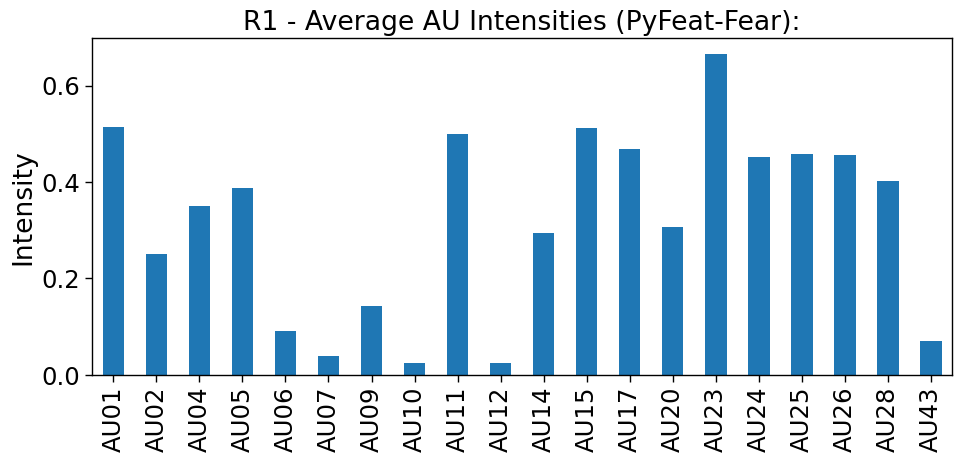

In [21]:
import matplotlib.pyplot as plt

average_aus.plot(kind='bar', figsize=(10, 5), title="R1 - Average AU Intensities (PyFeat-Fear):")
plt.ylabel("Intensity")
plt.tight_layout()
plt.savefig("/home/maram/Downloads/PrendreLaParole/newFPS/resident1/fear/fear_pyFeat_au_plot.png")
plt.show()

In [22]:
video_predictionFear.emotions.head()

,anger,disgust,fear,happiness,sadness,surprise,neutral
frame,,,,,,,
0,0.089538,0.000504,0.009134,0.005596,0.007225,0.756885,0.131118
1,0.107655,0.000479,0.005422,0.014981,0.002478,0.831767,0.037218
2,0.108985,0.000491,0.005492,0.015056,0.002528,0.830008,0.037441
3,0.072051,0.000349,0.002681,0.006318,0.002376,0.854208,0.062018
4,0.105178,0.000558,0.004185,0.007160,0.002336,0.838799,0.041783


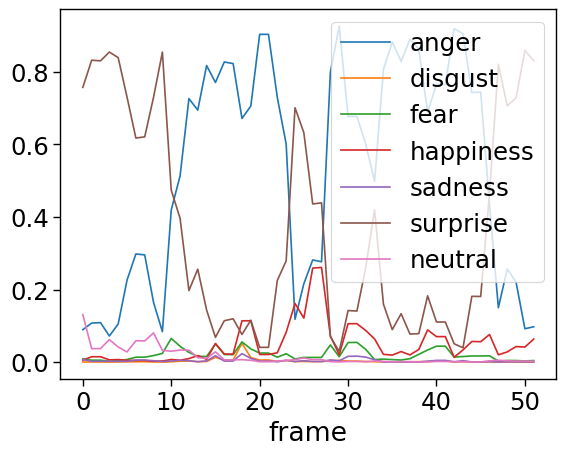

In [23]:
axes = video_predictionFear.emotions.plot()

## 3. Processing the 3rd video: Sadness

### 3.1 Load the video

In [24]:
emotionSadness_dir = os.path.join(base_path, "sadness")

for filename in os.listdir(emotionSadness_dir):
    if filename.lower().endswith(".mp4"):
        path_to_vidSadness = os.path.join(emotionSadness_dir, filename)
        print(f"\n--- sadness ---")
        video = cv2.VideoCapture(path_to_vidSadness)
        fps = video.get(cv2.CAP_PROP_FPS)
        print(f"FPS: {fps}")
        video.release()
        display(Video(path_to_vidSadness, embed=False))



--- sadness ---
FPS: 25.0


### 3.2 Process the video

In [25]:
video_predictionSadness = detector.detect_video(
    path_to_vidSadness, data_type="video", skip_frames=1, face_detection_threshold=0.95
)

  0%|          | 0/68 [00:00<?, ?it/s]INFO:root:VideoDataset: RESCALING WARNING: from (720, 1280) to output_size=700
INFO:root:detecting faces...
INFO:root:detecting landmarks...
INFO:root:RESCALING WARNING: image_operations.extract_face_from_bbox() is rescaling cropped img with shape torch.Size([3, 74, 74]) to 112
INFO:root:detecting poses...
INFO:root:img2pose: RESCALING WARNING: img2pose has a min img size of 400 and a max img size of 1400 but checked value is torch.Size([393, 700]).
INFO:root:detecting aus...
INFO:root:detecting emotions...
INFO:root:detecting identity...
INFO:root:RESCALING WARNING: image_operations.extract_face_from_bbox() is rescaling cropped img with shape torch.Size([3, 74, 74]) to 112
INFO:root:inverting face transform...
INFO:root:inverting landmark transform...
INFO:root:creating fex output...
  1%|▏         | 1/68 [00:01<01:11,  1.06s/it]INFO:root:VideoDataset: RESCALING WARNING: from (720, 1280) to output_size=700
INFO:root:detecting faces...
INFO:root:de

### save as csv

In [26]:
import os

csv_path = os.path.join(os.path.dirname(path_to_vidSadness), "pyFeat-sadness.csv")
video_predictionSadness.aus.to_csv(csv_path)

### 3.3 Visualizing results

In [27]:
video_predictionSadness.aus

,AU01,AU02,AU04,AU05,AU06,AU07,AU09,AU10,AU11,AU12,AU14,AU15,AU17,AU20,AU23,AU24,AU25,AU26,AU28,AU43
frame,,,,,,,,,,,,,,,,,,,,
0,0.450524,0.150245,0.756499,0.468268,0.065575,0.0,0.115687,0.033261,0.0,0.019627,0.237159,0.140246,0.339113,0.0,0.464537,0.212659,0.813926,0.345846,0.144139,0.042289
1,0.470098,0.239242,0.659009,0.425461,0.053936,0.0,0.128953,0.032460,0.0,0.021688,0.126665,0.392318,0.293088,0.0,0.457978,0.230736,0.531282,0.414037,0.103689,0.040858
2,0.322264,0.145383,0.345382,0.351993,0.060473,0.0,0.122802,0.030969,1.0,0.018284,0.238591,0.492661,0.344793,0.0,0.657728,0.251555,0.349362,0.280003,0.039420,0.025595
3,0.313060,0.165734,0.477793,0.351993,0.060365,0.0,0.127643,0.009551,1.0,0.018998,0.222797,0.550062,0.373381,0.0,0.666693,0.328876,0.401482,0.302937,0.043352,0.024735
4,0.384450,0.138526,0.332354,0.342394,0.071212,0.0,0.214433,0.124338,1.0,0.023308,0.165824,0.504780,0.294333,0.0,0.564966,0.262156,0.729307,0.400156,0.075268,0.103046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,0.679628,0.374641,0.257013,0.264973,0.077231,0.0,0.402178,0.002542,1.0,0.027578,0.585136,0.308371,0.659218,0.0,0.731547,0.601336,0.066498,0.142843,0.794356,0.329637
64,0.620786,0.651369,0.239981,0.366763,0.074265,0.0,0.129792,0.005071,0.0,0.023209,0.266256,0.378565,0.731396,0.0,0.729436,0.781252,0.093296,0.166022,0.638948,0.354692
65,0.614447,0.539263,0.286433,0.352864,0.068328,0.0,0.120651,0.004413,0.0,0.019703,0.261443,0.432604,0.695272,0.0,0.715156,0.765145,0.042170,0.131579,0.581564,0.388678


In [28]:
average_aus = video_predictionSadness.aus.mean()

# Display the result
print("Average AU intensities across all frames (sadness):\n")
print(average_aus)

Average AU intensities across all frames (sadness):

AU01    0.609349
AU02    0.451758
AU04    0.343885
AU05    0.371329
AU06    0.090864
AU07    0.015385
AU09    0.198682
AU10    0.028105
AU11    0.123077
AU12    0.027985
AU14    0.348234
AU15    0.467318
AU17    0.582662
AU20    0.015385
AU23    0.678945
AU24    0.533432
AU25    0.216507
AU26    0.268320
AU28    0.408825
AU43    0.180775
dtype: float32


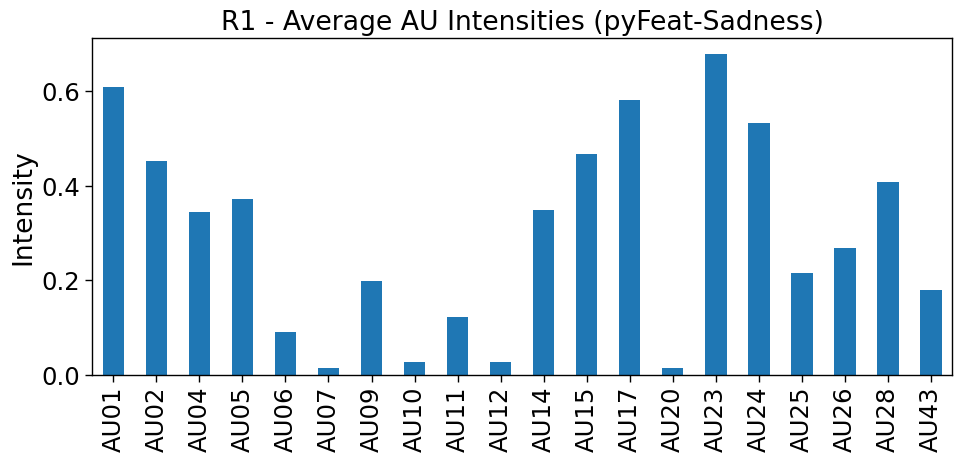

In [29]:
import matplotlib.pyplot as plt

average_aus.plot(kind='bar', figsize=(10, 5), title="R1 - Average AU Intensities (pyFeat-Sadness)")
plt.ylabel("Intensity")
plt.tight_layout()
plt.savefig("/home/maram/Downloads/PrendreLaParole/newFPS/resident1/sadness/sadness_pyFeat_au_plot.png")
plt.show()

In [30]:
video_predictionSadness.emotions.head()

,anger,disgust,fear,happiness,sadness,surprise,neutral
frame,,,,,,,
0,0.920676,0.000670,0.041913,0.011786,0.001601,0.020306,0.003049
1,0.928246,0.000833,0.024491,0.006567,0.001020,0.036650,0.002193
2,0.749525,0.002784,0.170080,0.014702,0.002418,0.058138,0.002354
3,0.749525,0.002784,0.170080,0.014702,0.002418,0.058138,0.002354
4,0.613744,0.001577,0.287749,0.011320,0.002974,0.081355,0.001281


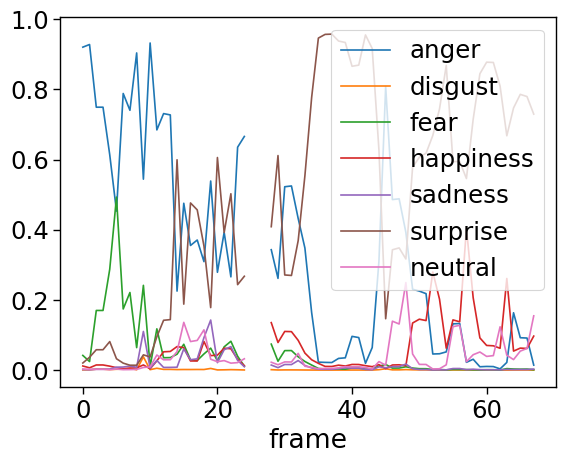

In [31]:
axes = video_predictionSadness.emotions.plot()

## 4. Processing the 4th video: Disgust

### 4.1 Load the video

In [32]:
emotionDisgust_dir = os.path.join(base_path, "disgust")

for filename in os.listdir(emotionDisgust_dir):
    if filename.lower().endswith(".mp4"):
        path_to_vidDisgust = os.path.join(emotionDisgust_dir, filename)
        print(f"\n--- disgust ---")
        video = cv2.VideoCapture(path_to_vidDisgust)
        fps = video.get(cv2.CAP_PROP_FPS)
        print(f"FPS: {fps}")
        video.release()
        display(Video(path_to_vidDisgust, embed=False))



--- disgust ---
FPS: 25.0


### 4.2 Process the video

In [33]:
video_predictionDisgust = detector.detect_video(
    path_to_vidDisgust, data_type="video", skip_frames=1, face_detection_threshold=0.95
)

  0%|          | 0/77 [00:00<?, ?it/s]INFO:root:VideoDataset: RESCALING WARNING: from (720, 1280) to output_size=700
INFO:root:detecting faces...
INFO:root:detecting landmarks...
INFO:root:RESCALING WARNING: image_operations.extract_face_from_bbox() is rescaling cropped img with shape torch.Size([3, 66, 66]) to 112
INFO:root:detecting poses...
INFO:root:img2pose: RESCALING WARNING: img2pose has a min img size of 400 and a max img size of 1400 but checked value is torch.Size([393, 700]).
INFO:root:detecting aus...
INFO:root:detecting emotions...
INFO:root:detecting identity...
INFO:root:RESCALING WARNING: image_operations.extract_face_from_bbox() is rescaling cropped img with shape torch.Size([3, 66, 66]) to 112
INFO:root:inverting face transform...
INFO:root:inverting landmark transform...
INFO:root:creating fex output...
  1%|▏         | 1/77 [00:01<01:22,  1.09s/it]INFO:root:VideoDataset: RESCALING WARNING: from (720, 1280) to output_size=700
INFO:root:detecting faces...
INFO:root:de

### Save as csv

In [34]:
import os

csv_path = os.path.join(os.path.dirname(path_to_vidDisgust), "pyFeat-disgust.csv")
video_predictionDisgust.aus.to_csv(csv_path)

### 3.3 Visualizing results

In [35]:
video_predictionDisgust.aus

,AU01,AU02,AU04,AU05,AU06,AU07,AU09,AU10,AU11,AU12,AU14,AU15,AU17,AU20,AU23,AU24,AU25,AU26,AU28,AU43
frame,,,,,,,,,,,,,,,,,,,,
0,0.458807,0.176282,0.381161,0.490898,0.063280,0.0,0.096774,0.005656,0.0,0.020703,0.263837,0.622542,0.443354,0.0,0.428993,0.387583,0.973306,0.602446,0.088648,0.108175
1,0.472311,0.204613,0.397059,0.490898,0.062459,0.0,0.101904,0.003190,0.0,0.022252,0.253545,0.585430,0.445504,0.0,0.420691,0.411503,0.976511,0.677494,0.074889,0.110786
2,0.362058,0.160859,0.514453,0.507442,0.071065,0.0,0.085355,0.032147,0.0,0.034659,0.277435,0.526187,0.556055,0.0,0.623049,0.382504,0.826258,0.708336,0.416283,0.156237
3,0.360893,0.155603,0.638228,0.262972,0.093566,0.0,0.462989,0.000561,0.0,0.045270,0.335560,0.530659,0.579964,0.0,0.597214,0.500402,0.892707,0.636573,0.371693,0.531235
4,0.319963,0.140668,0.345529,0.460680,0.106642,0.0,0.109576,0.000995,0.0,0.054860,0.329490,0.715409,0.556557,0.0,0.564006,0.741799,0.821606,0.691179,0.391640,0.115785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,0.391095,0.200816,0.453841,0.393001,0.131427,1.0,0.214314,0.018501,1.0,0.063421,0.100367,0.298134,0.257225,1.0,0.442181,0.010815,0.999987,0.775973,0.050446,0.129753
73,0.440212,0.197626,0.315675,0.413221,0.148031,1.0,0.113425,0.002299,0.0,0.068270,0.124092,0.256416,0.359265,1.0,0.322772,0.032009,0.999547,0.774805,0.017017,0.142406
74,0.467697,0.369953,0.263001,0.446287,0.144235,0.0,0.130918,0.081784,1.0,0.053985,0.107749,0.434017,0.412275,1.0,0.471045,0.048365,0.999776,0.892757,0.011161,0.098551


In [36]:
average_aus = video_predictionDisgust.aus.mean()

# Display the result
print("Average AU intensities across all frames (Dsigust):\n")
print(average_aus)

Average AU intensities across all frames (Dsigust):

AU01    0.375597
AU02    0.191256
AU04    0.395901
AU05    0.381969
AU06    0.144091
AU07    0.078125
AU09    0.218230
AU10    0.072942
AU11    0.484375
AU12    0.069097
AU14    0.253347
AU15    0.471839
AU17    0.425253
AU20    0.375000
AU23    0.526558
AU24    0.329959
AU25    0.725510
AU26    0.631943
AU28    0.307125
AU43    0.112629
dtype: float32


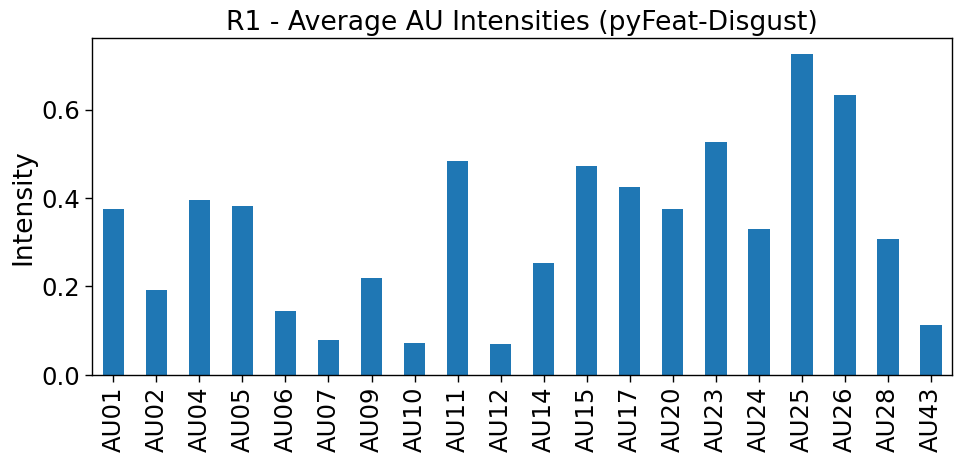

In [37]:
import matplotlib.pyplot as plt

average_aus.plot(kind='bar', figsize=(10, 5), title="R1 - Average AU Intensities (pyFeat-Disgust)")
plt.ylabel("Intensity")
plt.tight_layout()
plt.savefig("/home/maram/Downloads/PrendreLaParole/newFPS/resident1/disgust/disgust_pyFeat_au_plot.png")

plt.show()

In [38]:
video_predictionDisgust.emotions.head()

,anger,disgust,fear,happiness,sadness,surprise,neutral
frame,,,,,,,
0,0.941680,0.002214,0.006796,0.005871,0.001560,0.040148,0.001731
1,0.942345,0.002193,0.006715,0.005729,0.001531,0.039781,0.001705
2,0.925633,0.001462,0.004961,0.003650,0.003349,0.044895,0.016050
3,0.522231,0.004027,0.051069,0.036748,0.018262,0.331702,0.035962
4,0.498136,0.000681,0.007586,0.009128,0.010049,0.402160,0.072260


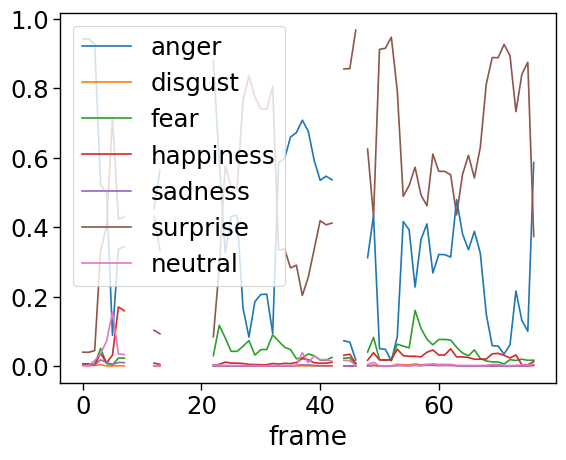

In [39]:
axes = video_predictionDisgust.emotions.plot()

## 5. Processing the 5th video: Surprise

### 5.1 Load th video

In [40]:
emotionSurprise_dir = os.path.join(base_path, "surprise")

for filename in os.listdir(emotionSurprise_dir):
    if filename.lower().endswith(".mp4"):
        path_to_vidSurprise = os.path.join(emotionSurprise_dir, filename)
        print(f"\n--- surprise ---")
        video = cv2.VideoCapture(path_to_vidSurprise)
        fps = video.get(cv2.CAP_PROP_FPS)
        print(f"FPS: {fps}")
        video.release()
        display(Video(path_to_vidSurprise, embed=False))


--- surprise ---
FPS: 25.0


### 5.2 Process the video

In [41]:
video_predictionSurprise = detector.detect_video(
    path_to_vidSurprise, data_type="video", skip_frames=1, face_detection_threshold=0.95
)

  0%|          | 0/55 [00:00<?, ?it/s]INFO:root:VideoDataset: RESCALING WARNING: from (720, 1280) to output_size=700
INFO:root:detecting faces...
INFO:root:detecting landmarks...
INFO:root:RESCALING WARNING: image_operations.extract_face_from_bbox() is rescaling cropped img with shape torch.Size([3, 78, 78]) to 112
INFO:root:detecting poses...
INFO:root:img2pose: RESCALING WARNING: img2pose has a min img size of 400 and a max img size of 1400 but checked value is torch.Size([393, 700]).
INFO:root:detecting aus...
INFO:root:detecting emotions...
INFO:root:detecting identity...
INFO:root:RESCALING WARNING: image_operations.extract_face_from_bbox() is rescaling cropped img with shape torch.Size([3, 78, 78]) to 112
INFO:root:inverting face transform...
INFO:root:inverting landmark transform...
INFO:root:creating fex output...
  2%|▏         | 1/55 [00:01<01:05,  1.20s/it]INFO:root:VideoDataset: RESCALING WARNING: from (720, 1280) to output_size=700
INFO:root:detecting faces...
INFO:root:de

### save as csv

In [42]:
import os

csv_path = os.path.join(os.path.dirname(path_to_vidSurprise), "pyFeat-surprise.csv")
video_predictionSurprise.aus.to_csv(csv_path)

### 5.3 Visualizing results

In [43]:
video_predictionSurprise.aus

,AU01,AU02,AU04,AU05,AU06,AU07,AU09,AU10,AU11,AU12,AU14,AU15,AU17,AU20,AU23,AU24,AU25,AU26,AU28,AU43
frame,,,,,,,,,,,,,,,,,,,,
0,0.712299,0.512429,0.284931,0.465851,0.112924,0.0,0.118160,0.082228,0.0,0.133133,0.090379,0.248840,0.269342,1.0,0.202817,0.049136,0.999484,0.777453,0.099970,0.193790
1,0.628956,0.330403,0.377122,0.343638,0.148422,1.0,0.119176,0.140690,0.0,0.210093,0.377168,0.212458,0.330389,1.0,0.490691,0.016307,0.998873,0.937025,0.058583,0.091213
2,0.649016,0.477259,0.350429,0.389467,0.187594,1.0,0.134740,0.008229,1.0,0.100295,0.121403,0.739404,0.374522,1.0,0.263645,0.060429,0.999281,0.915272,0.103593,0.119088
3,0.673797,0.476544,0.460108,0.389467,0.174398,1.0,0.126476,0.027567,1.0,0.100304,0.117446,0.642557,0.373716,1.0,0.255174,0.063339,0.998780,0.910857,0.092701,0.124975
4,0.652888,0.410656,0.266065,0.468006,0.126088,0.0,0.146201,0.020699,1.0,0.150422,0.104874,0.412310,0.331839,1.0,0.273021,0.043284,0.999724,0.808284,0.110073,0.054030
5,0.511460,0.286294,0.429313,0.425031,0.178138,0.0,0.117557,0.009187,1.0,0.159993,0.186912,0.195675,0.277576,1.0,0.385292,0.026047,0.999813,0.981229,0.306053,0.044130
6,0.522451,0.253639,0.290091,0.346461,0.125870,0.0,0.138019,0.029722,1.0,0.110945,0.133914,0.200979,0.301041,1.0,0.260429,0.036068,0.999508,0.897684,0.057256,0.075162
7,0.473096,0.323068,0.220041,0.347958,0.128918,0.0,0.113016,0.001574,0.0,0.151934,0.208389,0.415895,0.335064,1.0,0.252574,0.035605,0.994583,0.831938,0.083026,0.086457
8,0.478355,0.329748,0.262138,0.347958,0.128918,0.0,0.112598,0.001870,0.0,0.150617,0.231926,0.349525,0.329018,1.0,0.253721,0.038997,0.997745,0.837525,0.074869,0.079224


In [44]:
average_aus = video_predictionSurprise.aus.mean()

# Display the result
print("Average AU intensities across all frames (Surprise):\n")
print(average_aus)

Average AU intensities across all frames (Surprise):

AU01    0.611439
AU02    0.400541
AU04    0.463717
AU05    0.434785
AU06    0.149107
AU07    0.205128
AU09    0.179345
AU10    0.057447
AU11    0.487179
AU12    0.070567
AU14    0.178075
AU15    0.309498
AU17    0.366825
AU20    0.717949
AU23    0.331904
AU24    0.122953
AU25    0.948218
AU26    0.727602
AU28    0.165788
AU43    0.132053
dtype: float32


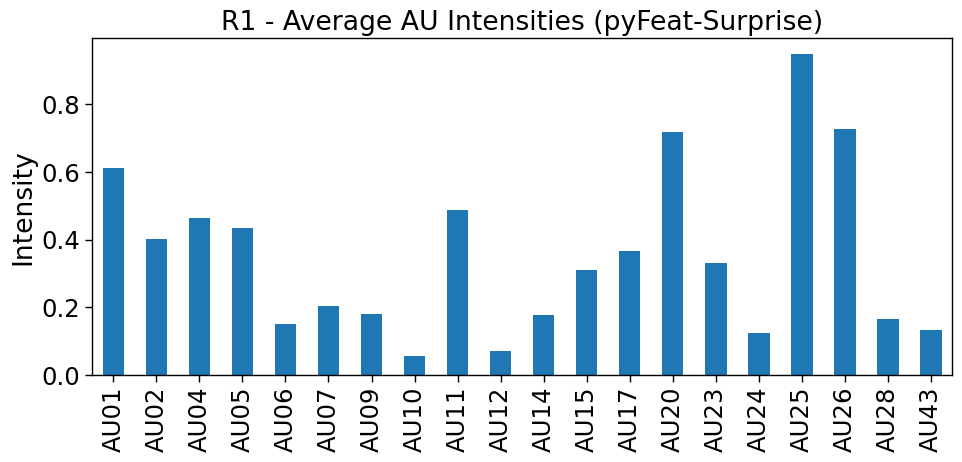

In [45]:
import matplotlib.pyplot as plt

average_aus.plot(kind='bar', figsize=(10, 5), title="R1 - Average AU Intensities (pyFeat-Surprise)")
plt.ylabel("Intensity")
plt.tight_layout()
plt.savefig("/home/maram/Downloads/PrendreLaParole/newFPS/resident1/surprise/surprise_pyFeat_au_plot.png")
plt.show()

In [46]:
video_predictionSurprise.emotions.head()

,anger,disgust,fear,happiness,sadness,surprise,neutral
frame,,,,,,,
0,0.170890,0.000307,0.007365,0.022225,0.000186,0.797645,0.001381
1,0.138352,0.000261,0.005788,0.020901,0.000180,0.833375,0.001144
2,0.170821,0.000265,0.007376,0.027213,0.000177,0.793617,0.000531
3,0.177717,0.000282,0.007866,0.027759,0.000185,0.785656,0.000534
4,0.207962,0.000711,0.058061,0.063418,0.000708,0.667533,0.001607


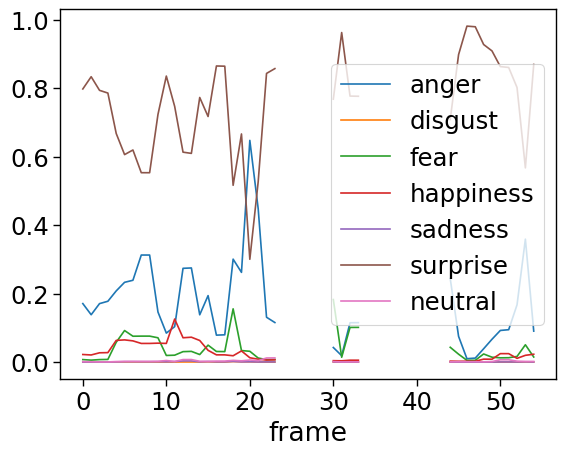

In [47]:
axes = video_predictionSurprise.emotions.plot()

## 6. Processing the 6th video: Anger

### 6.1 Load the video

In [48]:
emotionAnger_dir = os.path.join(base_path, "anger")

for filename in os.listdir(emotionAnger_dir):
    if filename.lower().endswith(".mp4"):
        path_to_vidAnger = os.path.join(emotionAnger_dir, filename)
        print(f"\n--- anger ---")
        video = cv2.VideoCapture(path_to_vidAnger)
        fps = video.get(cv2.CAP_PROP_FPS)
        print(f"FPS: {fps}")
        video.release()
        display(Video(path_to_vidAnger, embed=False))


--- anger ---
FPS: 25.0


### 6.2 Process the video

In [49]:
video_predictionAnger = detector.detect_video(
    path_to_vidAnger, data_type="video", skip_frames=1, face_detection_threshold=0.95
)

  0%|          | 0/46 [00:00<?, ?it/s]INFO:root:VideoDataset: RESCALING WARNING: from (720, 1280) to output_size=700
INFO:root:detecting faces...
INFO:root:detecting landmarks...
INFO:root:RESCALING WARNING: image_operations.extract_face_from_bbox() is rescaling cropped img with shape torch.Size([3, 74, 74]) to 112
INFO:root:detecting poses...
INFO:root:img2pose: RESCALING WARNING: img2pose has a min img size of 400 and a max img size of 1400 but checked value is torch.Size([393, 700]).
INFO:root:detecting aus...
INFO:root:detecting emotions...
INFO:root:detecting identity...
INFO:root:RESCALING WARNING: image_operations.extract_face_from_bbox() is rescaling cropped img with shape torch.Size([3, 74, 74]) to 112
INFO:root:inverting face transform...
INFO:root:inverting landmark transform...
INFO:root:creating fex output...
  2%|▏         | 1/46 [00:01<00:50,  1.13s/it]INFO:root:VideoDataset: RESCALING WARNING: from (720, 1280) to output_size=700
INFO:root:detecting faces...
INFO:root:de

### save as csv

In [50]:
import os

csv_path = os.path.join(os.path.dirname(path_to_vidAnger), "pyFeat-anger.csv")
video_predictionAnger.aus.to_csv(csv_path)

### 6.3 Visualizing results

In [51]:
video_predictionAnger.aus

,AU01,AU02,AU04,AU05,AU06,AU07,AU09,AU10,AU11,AU12,AU14,AU15,AU17,AU20,AU23,AU24,AU25,AU26,AU28,AU43
frame,,,,,,,,,,,,,,,,,,,,
0,0.691048,0.480511,0.231122,0.673876,0.073777,0.0,0.131443,0.002204,0.0,0.042092,0.086690,0.522027,0.470301,0.0,0.613607,0.175665,0.148349,0.313566,0.185853,0.096689
1,0.699424,0.476978,0.182947,0.665001,0.073662,0.0,0.139282,0.004630,0.0,0.041619,0.089624,0.622669,0.519131,0.0,0.567982,0.147391,0.279636,0.347963,0.118076,0.088202
2,0.746343,0.773075,0.145437,0.583387,0.065098,0.0,0.138121,0.000095,1.0,0.035410,0.054262,0.376633,0.518776,0.0,0.500527,0.284691,0.018445,0.215736,0.168706,0.102252
3,0.759698,0.357335,0.203317,0.510220,0.055219,0.0,0.122206,0.006440,1.0,0.012784,0.093012,0.280999,0.504208,0.0,0.433683,0.101591,0.956624,0.726337,0.044359,0.042402
4,0.715610,0.419581,0.482074,0.476473,0.053962,0.0,0.118239,0.001164,0.0,0.015050,0.185588,0.403420,0.419329,1.0,0.426064,0.148975,0.991103,0.815479,0.079754,0.054807
5,0.473988,0.495952,0.184310,0.425205,0.081499,0.0,0.143341,0.004460,0.0,0.017257,0.210683,0.378815,0.430846,0.0,0.411545,0.180527,0.996007,0.850997,0.275145,0.052848
6,0.553867,0.438994,0.413258,0.480193,0.067519,0.0,0.112673,0.110941,0.0,0.016951,0.099396,0.258750,0.567798,0.0,0.578306,0.245079,0.998465,0.873503,0.079681,0.095421
7,0.529930,0.450158,0.332063,0.456632,0.066851,0.0,0.112622,0.057439,0.0,0.015536,0.087110,0.214135,0.428020,0.0,0.499791,0.212511,0.998880,0.923415,0.051207,0.066880
8,0.370719,0.286491,0.535332,0.287082,0.068549,0.0,0.164770,0.009450,0.0,0.012127,0.116936,0.510178,0.521014,1.0,0.657788,0.265013,0.998337,0.913990,0.100870,0.181077


In [52]:
average_aus = video_predictionAnger.aus.mean()

# Display the result
print("Average AU intensities across all frames (Anger) :\n")
print(average_aus)

Average AU intensities across all frames (Anger) :

AU01    0.452797
AU02    0.334989
AU04    0.211001
AU05    0.388477
AU06    0.207013
AU07    0.065217
AU09    0.209158
AU10    0.098184
AU11    0.521739
AU12    0.153756
AU14    0.410316
AU15    0.444355
AU17    0.481980
AU20    0.652174
AU23    0.654072
AU24    0.398801
AU25    0.724546
AU26    0.382888
AU28    0.222996
AU43    0.109754
dtype: float32


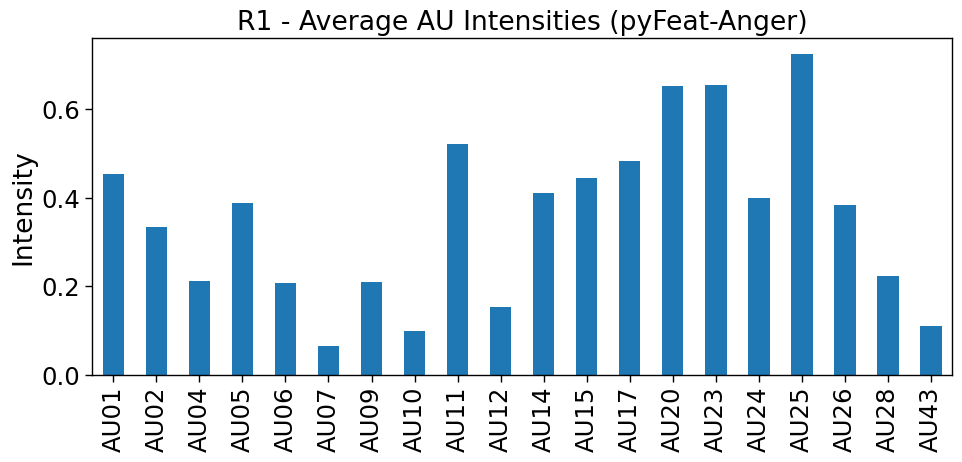

In [56]:
import matplotlib.pyplot as plt

average_aus.plot(kind='bar', figsize=(10, 5), title="R1 - Average AU Intensities (pyFeat-Anger)")
plt.ylabel("Intensity")
plt.tight_layout()
plt.savefig("/home/maram/Downloads/PrendreLaParole/newFPS/resident1/anger/anger_pyFeat_au_plot.png")
plt.show()

In [54]:
video_predictionAnger.emotions.head()

,anger,disgust,fear,happiness,sadness,surprise,neutral
frame,,,,,,,
0,0.021353,0.000060,0.010647,0.008521,0.000257,0.956496,0.002665
1,0.020949,0.000057,0.010715,0.008395,0.000251,0.956836,0.002796
2,0.017313,0.000201,0.027397,0.015052,0.000368,0.937664,0.002006
3,0.217749,0.075403,0.068037,0.016686,0.009883,0.574693,0.037549
4,0.730398,0.005865,0.081437,0.012041,0.001684,0.155154,0.013422


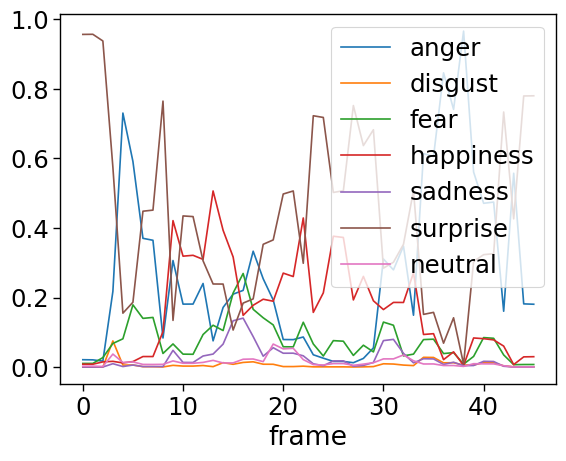

In [55]:
axes = video_predictionAnger.emotions.plot()